In [20]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


import json
import csv
import pandas as pd
import numpy as np

import networkx as nx

%matplotlib inline

In [21]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [22]:
df = pd.read_csv("data.csv", index_col=[0])

In [23]:
df

,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,...,annotations_probability,annotations_start,annotations_type,urls_display_url,urls_end,urls_expanded_url,urls_start,urls_status,urls_unwound_url,urls_url
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,['1610294585242300416'],"{'annotations': [{'end': 6, 'normalized_text':...",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864...",New ABB E-mobility home charging solution help...,abbgroupnews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,['1612750467859378178'],"{'annotations': [{'end': 2, 'normalized_text':...",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887...",ABB #technology to facilitate #energyefficienc...,abbgroupnews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,['1613113765595320321'],"{'annotations': [{'end': 51, 'normalized_text'...",1613113765595320321,en,"{'bookmark_count': 0, 'impression_count': 2559...",Better decisions for a greener data center! Ho...,abbgroupnews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'media_keys': ['3_1613462741569736704']},51801586,2023-01-12T09:09:45.000Z,['1613463229665271809'],"{'annotations': [{'end': 19, 'normalized_text'...",1613463229665271809,en,"{'bookmark_count': 0, 'impression_count': 2087...",ABB Formula E Season 9 goes green in Mexico!\n...,abbgroupnews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'media_keys': ['13_1613831618141261825']},51801586,2023-01-13T09:41:43.000Z,['1613833662625353729'],"{'annotations': [{'end': 7, 'normalized_text':...",1613833662625353729,en,"{'bookmark_count': 0, 'impression_count': 1975...",The #ABB Decoded #podcast with Frank Muehlon i...,abbgroupnews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10557,NaN,342772500,2023-12-27T11:27:46.000Z,['1739971327153299697'],"{'annotations': [{'end': 44, 'normalized_text'...",1739971327153299697,en,"{'bookmark_count': 0, 'impression_count': 65, ...","@ceguvite We are sorry to hear this, Cristian,...",volvocars,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10558,NaN,342772500,2023-12-27T12:30:13.000Z,['1739987045462798635'],"{'annotations': [{'end': 42, 'normalized_text'...",1739987045462798635,en,"{'bookmark_count': 0, 'impression_count': 56, ...","@russ_nicol We are sorry to hear this, Russ, p...",volvocars,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10559,NaN,342772500,2023-12-27T12:30:40.000Z,['1739987156708258246'],"{'annotations': [{'end': 138, 'normalized_text...",1739987156708258246,en,"{'bookmark_count': 0, 'impression_count': 59, ...","@guydebromhead We are sorry to hear this, plea...",volvocars,...,NaN,NaN,NaN,x.com/messages/compo…,132.0,https://twitter.com/messages/compose?recipient...,109.0,404.0,https://twitter.com/messages/compose?recipient...,https://t.co/CBGifTDzla
10560,NaN,342772500,2023-12-27T14:15:56.000Z,['1740013648133673208'],"{'annotations': [{'end': 115, 'normalized_text...",1740013648133673208,en,"{'bookmark_count': 0, 'impression_count': 58, ...",@cpbattersby Hi there we are sorry to hear thi...,volvocars,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


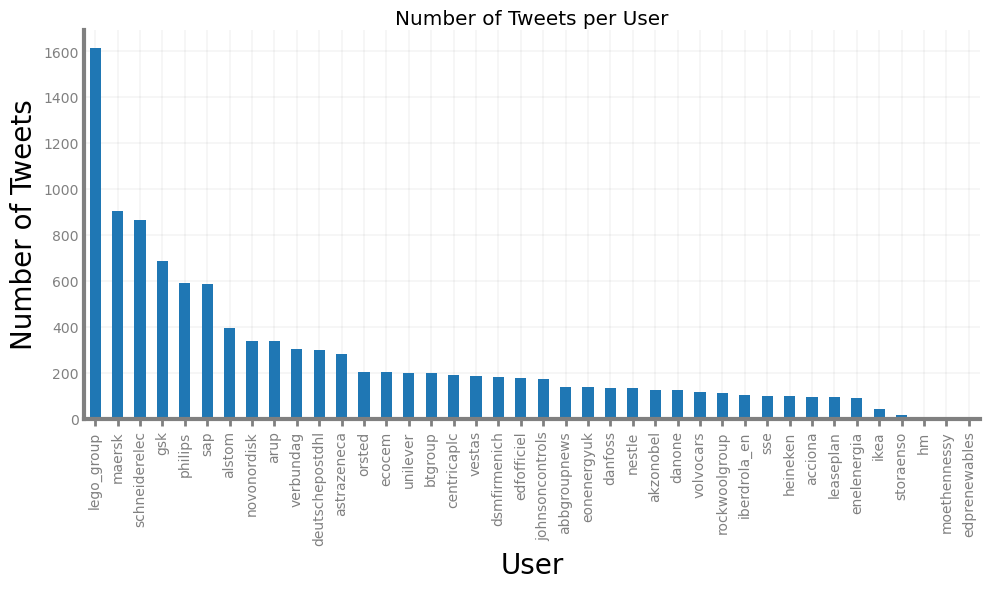

username
lego_group         1613
maersk              902
schneiderelec       866
gsk                 688
philips             590
sap                 587
alstom              393
novonordisk         339
arup                339
verbundag           302
deutschepostdhl     300
astrazeneca         280
orsted              203
ecocem              201
unilever            200
btgroup             198
centricaplc         188
vestas              187
dsmfirmenich        179
edfofficiel         178
johnsoncontrols     174
abbgroupnews        138
eonenergyuk         137
danfoss             133
nestle              132
akzonobel           125
danone              122
volvocars           116
rockwoolgroup       109
iberdrola_en        101
sse                 100
heineken            100
acciona              95
leaseplan            94
enelenergia          88
ikea                 41
storaenso            15
hm                    7
moethennessy          1
edprenewables         1
Name: count, dtype: int64


In [24]:
# Compute the number of total tweets per username/user_id
tweet_counts = df['username'].value_counts()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar', color='tab:blue')
plt.title('Number of Tweets per User')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(tweet_counts)

In [25]:
df['date'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [54]:
df = df.loc[df.username != 'heineken']

#### Daily tweet distribution

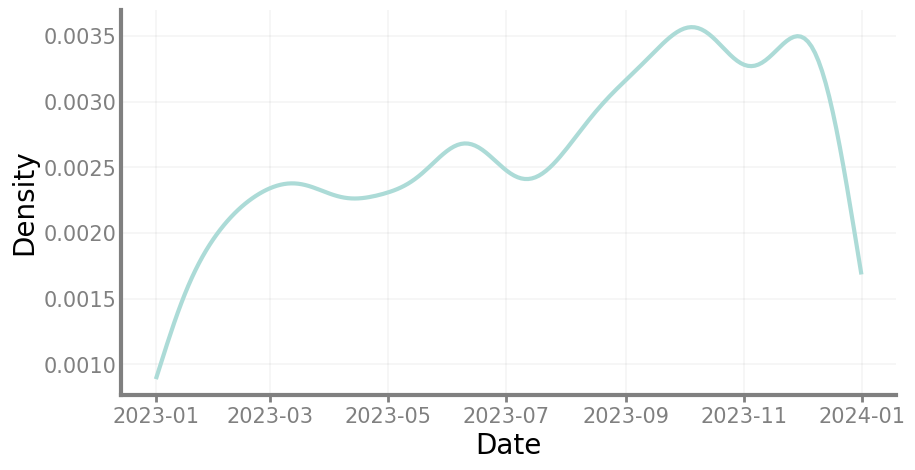

In [86]:
_, ax = plt.subplots(figsize=(10, 5))

# Create the KDE plot without the legend
g = sns.kdeplot(data=df, x="date", cut=0)

# Set x and y tick labels font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set x-axis label and its font size
plt.xlabel('Date')

# Show the plot
plt.show()

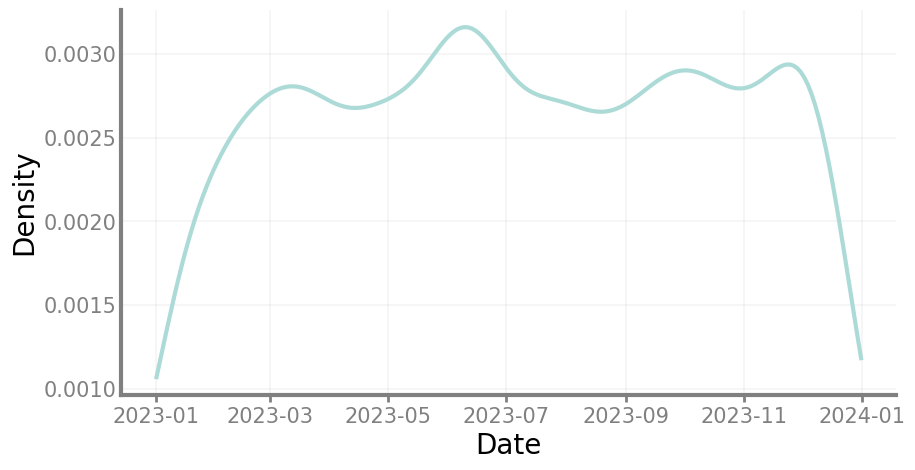

In [87]:
_, ax = plt.subplots(figsize=(10, 5))

# Create the KDE plot without the legend
g = sns.kdeplot(data=df.loc[df.username != 'lego_group'], x="date", cut=0)

# Set x and y tick labels font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set x-axis label and its font size
plt.xlabel('Date')

# Show the plot
plt.show()

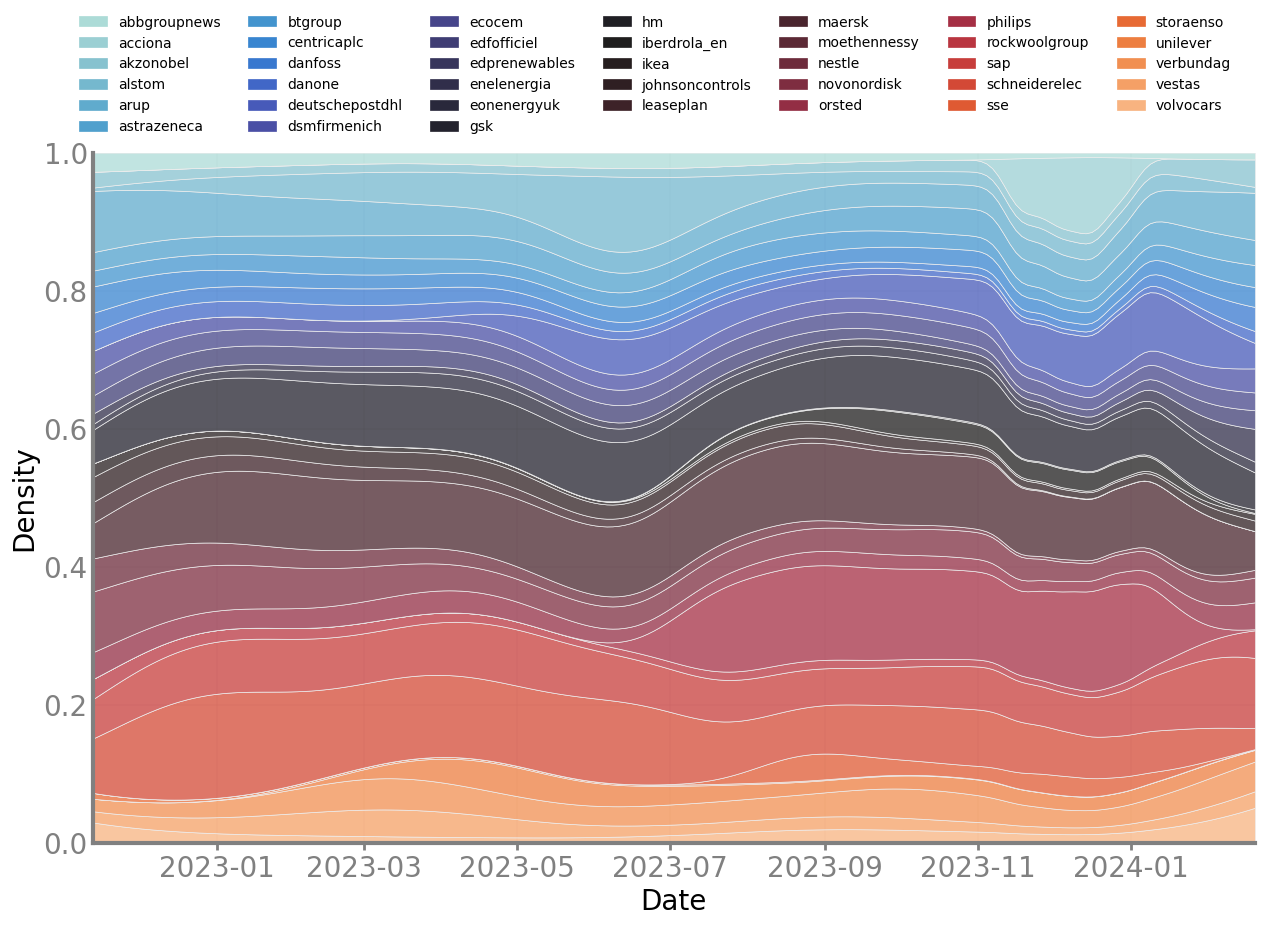

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Set the palette
palette = sns.color_palette("icefire", n_colors=len(df.username.unique()))
sns.set_palette(palette)

_, ax = plt.subplots(figsize=(15, 10))

# Create the KDE plot without the legend
g = sns.kdeplot(data=df.loc[df.username != 'lego_group'], x="date", hue="username", multiple="fill", legend=False)

# Get unique usernames
unique_usernames = df.loc[df.username != 'lego_group', 'username'].unique()

# Create custom legend handles
handles = [Patch(color=palette[i], label=unique_usernames[i]) for i in range(len(unique_usernames))]

# Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(unique_usernames), max_legend_columns)

# Adjust the subplot parameters to make room for the legend above the plot
plt.subplots_adjust(top=0.8)  # Increase top margin

# Create the legend
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=n_columns, frameon=False)

# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set x-axis label and its font size
plt.xlabel('Date')

# Show the plot
plt.show()



Text(0.5, 0, 'Date')

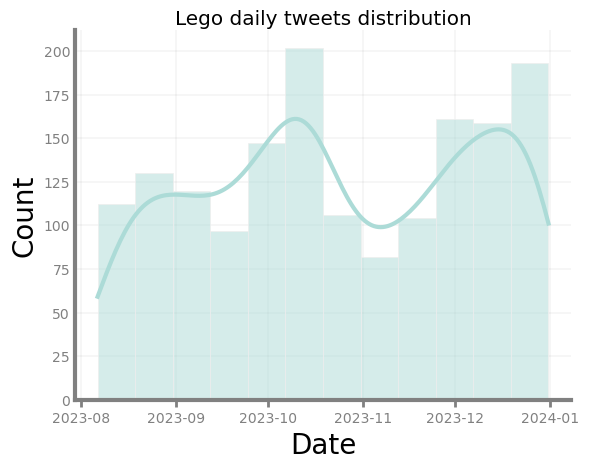

In [69]:
g = sns.histplot(data=df.loc[df.username == 'lego_group'], x="date", kde=True)
g.set_title("Lego daily tweets distribution")
g.set_xlabel("Date")

#### Weekly trends

In [144]:
df['week'] = df['date'].dt.isocalendar().week
df['week'].dtype
tmp = df.loc[df.username != 'lego_group']
df_plot = tmp.groupby(['week']).size()

In [145]:
df_plot

week
1     112
2     141
3     143
4     114
5     137
6     193
7     161
8     152
9     180
10    182
11    201
12    172
13    183
14    135
15    150
16    168
17    189
18    176
19    150
20    158
21    177
22    201
23    239
24    224
25    188
26    177
27    154
28    147
29    161
30    212
31    163
32    156
33    149
34    181
35    143
36    158
37    186
38    190
39    182
40    171
41    209
42    169
43    165
44    151
45    172
46    177
47    168
48    225
49    230
50    175
51    157
52     95
dtype: int64

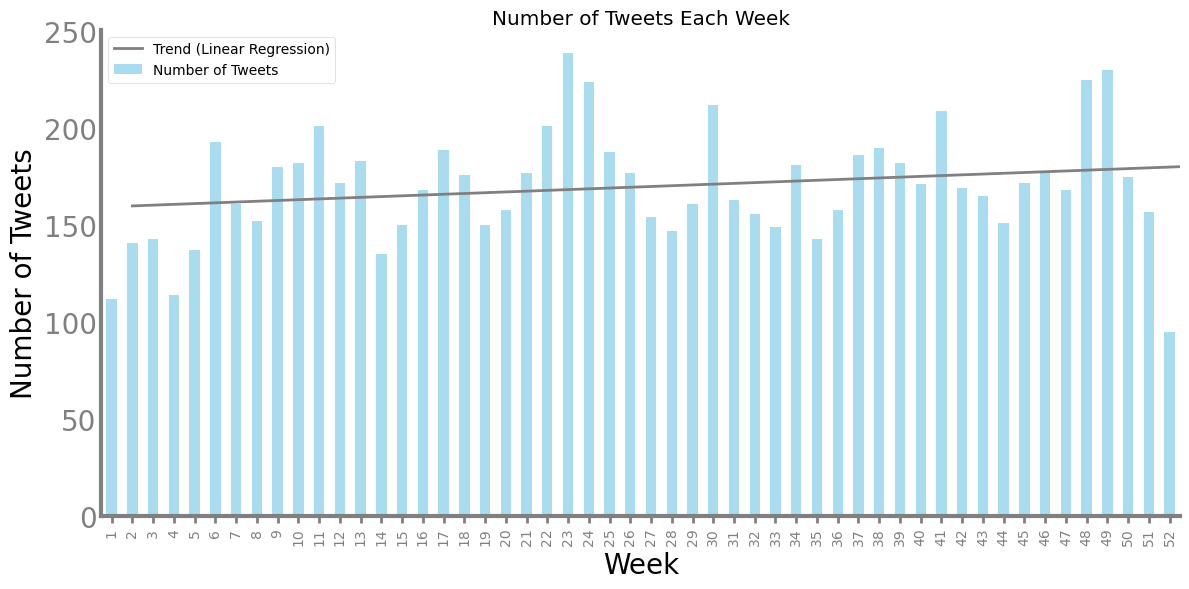

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is already defined and 'date' column is in datetime format
df['week'] = df['date'].dt.isocalendar().week
tmp = df.loc[df.username != 'lego_group']
df_plot = tmp.groupby(['week']).size()

# Prepare data for linear regression
weeks = df_plot.index.to_numpy(dtype=int)  # Ensure weeks are integers
tweets = df_plot.values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weeks, tweets)
regression_line = slope * weeks + intercept

# Plot the barplot
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', color='skyblue', alpha=0.7, label='Number of Tweets')

# Plot the linear regression trend line
plt.plot(weeks, regression_line, color='grey', linewidth=2, label='Trend (Linear Regression)')

plt.title('Number of Tweets Each Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()


In [162]:
maverage.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
      dtype='UInt32', name='week')

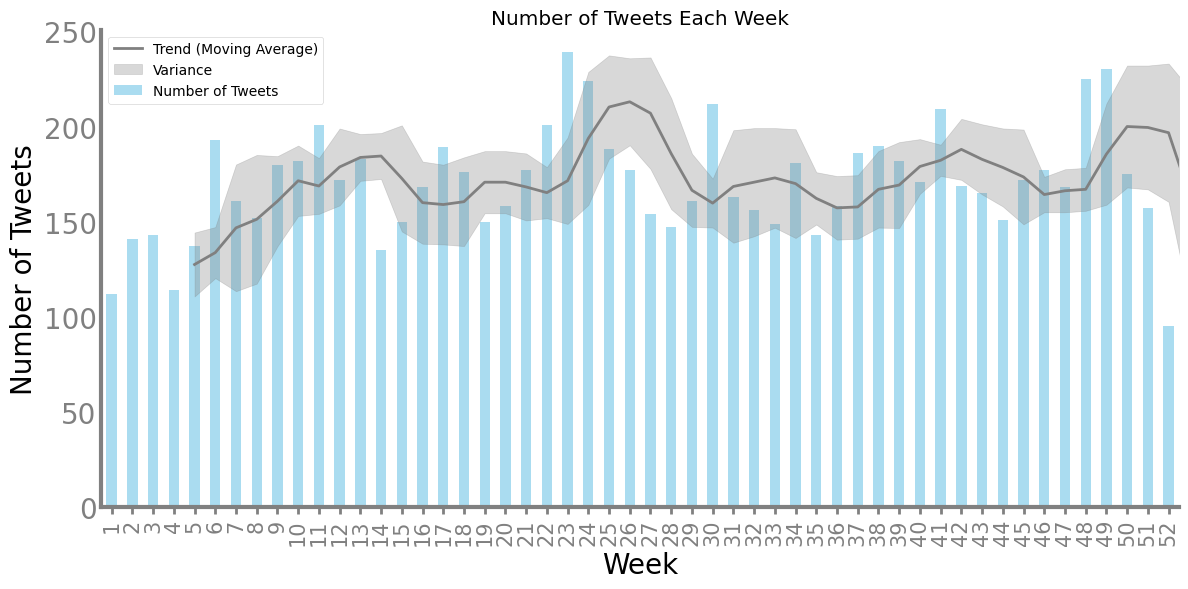

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is already defined and 'date' column is in datetime format
df['week'] = df['date'].dt.isocalendar().week
tmp = df.loc[df.username != 'lego_group']
df_plot = tmp.groupby(['week']).size()

# Compute the moving average
window_size = 4  # You can change the window size to fit your needs
maverage = df_plot.rolling(window=window_size).mean()

# Compute the standard deviation
std_dev = df_plot.rolling(window=window_size).std()

# Plot the barplot
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', color='skyblue', alpha=0.7, label='Number of Tweets')

# Plot the moving average trend line
plt.plot(maverage, color='grey', linewidth=2, label='Trend (Moving Average)')

# Plot the shaded area representing variance
plt.fill_between([i for i in range(1,53)], maverage-std_dev, maverage+std_dev, color='grey', alpha=0.3, label='Variance')

plt.title('Number of Tweets Each Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()



<Figure size 1500x1200 with 0 Axes>

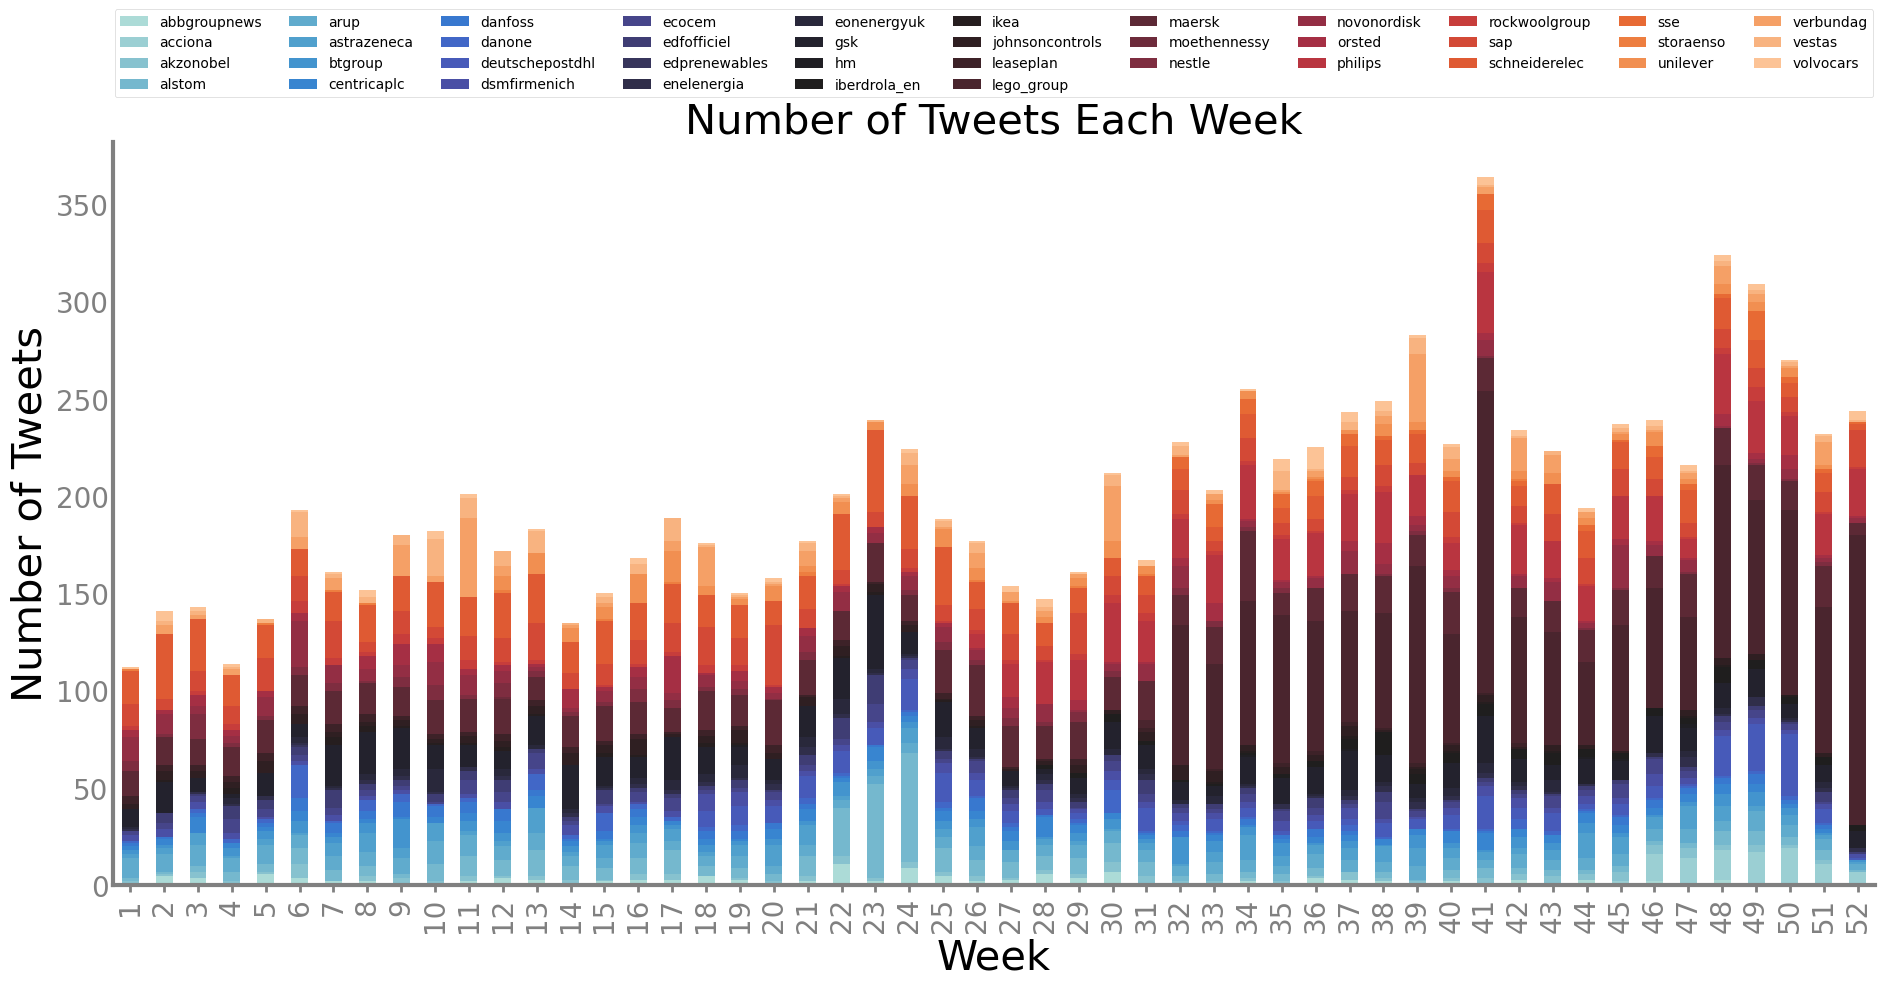

In [111]:
df_plot = df.groupby(['week', 'username']).size().reset_index().pivot(columns='username', index='week', values=0)

# Plotting
plt.figure(figsize=(15, 12))

# Plot Number of Tweets per Day
df_plot.plot(kind='bar', stacked=True)
plt.title('Number of Tweets Each Week', fontsize=30)
plt.xlabel('Week', fontsize=30)
plt.ylabel('Number of Tweets', fontsize=30)
# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Set x-axis label and its font size
plt.grid(False)
plt.legend(numpoints=1, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=11, markerscale=0.5)
plt.tight_layout()
plt.show()


#### Monthly trends

In [171]:
df['month'] = df['date'].dt.month
tmp = df.loc[df.username != 'lego_group']
df_plot = tmp.groupby(['month']).size()

In [172]:
df_plot

month
1     560
2     678
3     813
4     666
5     749
6     928
7     721
8     717
9     752
10    784
11    767
12    714
dtype: int64

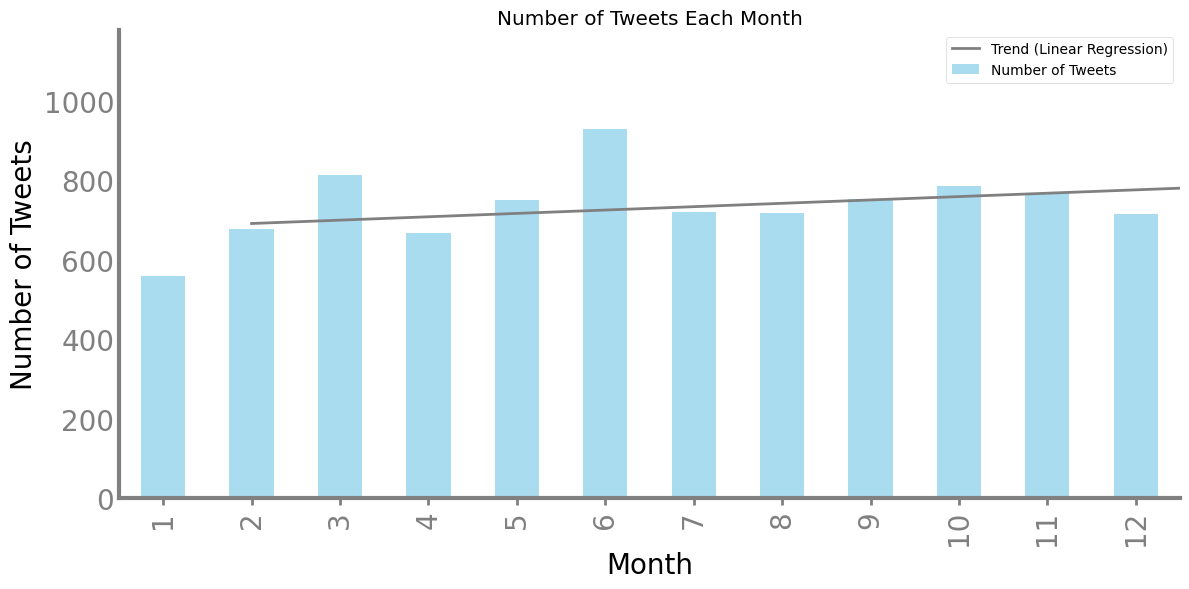

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is already defined and 'date' column is in datetime format
df['month'] = df['date'].dt.month
tmp = df.loc[df.username != 'lego_group']
df_plot = tmp.groupby(['month']).size()

# Prepare data for linear regression
months = df_plot.index.to_numpy(dtype=int)  # Ensure weeks are integers
tweets = df_plot.values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(months, tweets)
regression_line = slope * weeks + intercept

# Plot the barplot
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', color='skyblue', alpha=0.7, label='Number of Tweets')

# Plot the linear regression trend line
plt.plot(weeks, regression_line, color='grey', linewidth=2, label='Trend (Linear Regression)')

plt.title('Number of Tweets Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()


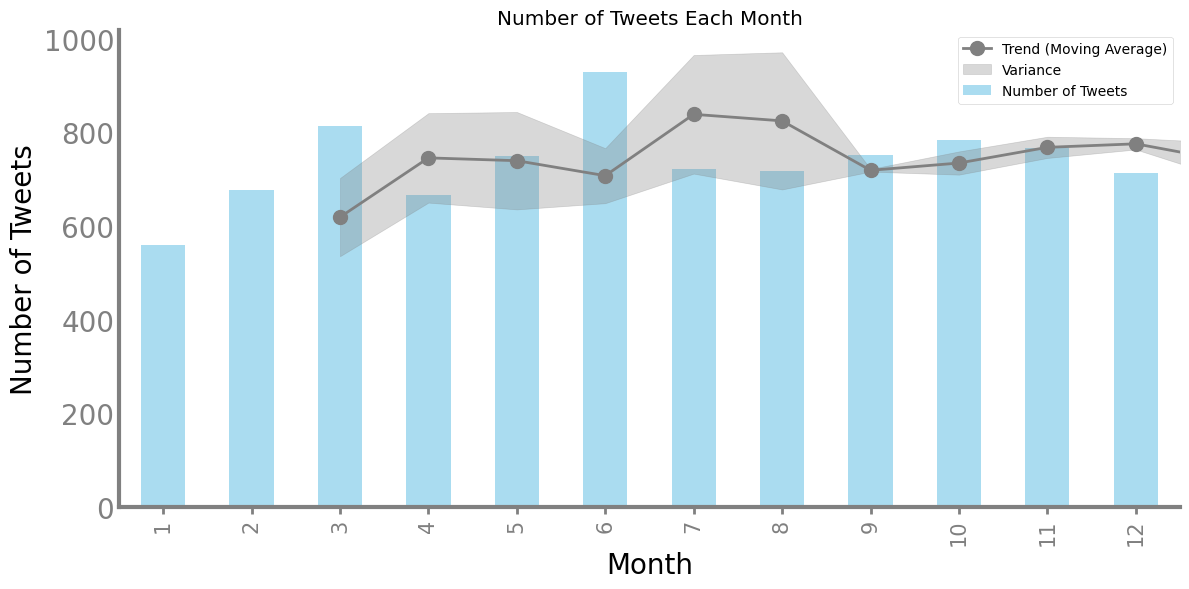

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is already defined and 'date' column is in datetime format
df['month'] = df['date'].dt.month
tmp = df.loc[df.username != 'lego_group']
df_plot = tmp.groupby(['month']).size()

# Compute the moving average
window_size = 2  # You can change the window size to fit your needs
maverage = df_plot.rolling(window=window_size).mean()

# Compute the standard deviation
std_dev = df_plot.rolling(window=window_size).std()

# Plot the barplot
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', color='skyblue', alpha=0.7, label='Number of Tweets')

# Plot the moving average trend line
plt.plot(maverage, color='grey', linewidth=2, marker = 'o', label='Trend (Moving Average)')

# Plot the shaded area representing variance
plt.fill_between([i for i in range(1,13)], maverage-std_dev, maverage+std_dev, color='grey', alpha=0.3, label='Variance')

plt.title('Number of Tweets Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()



<Figure size 1500x1200 with 0 Axes>

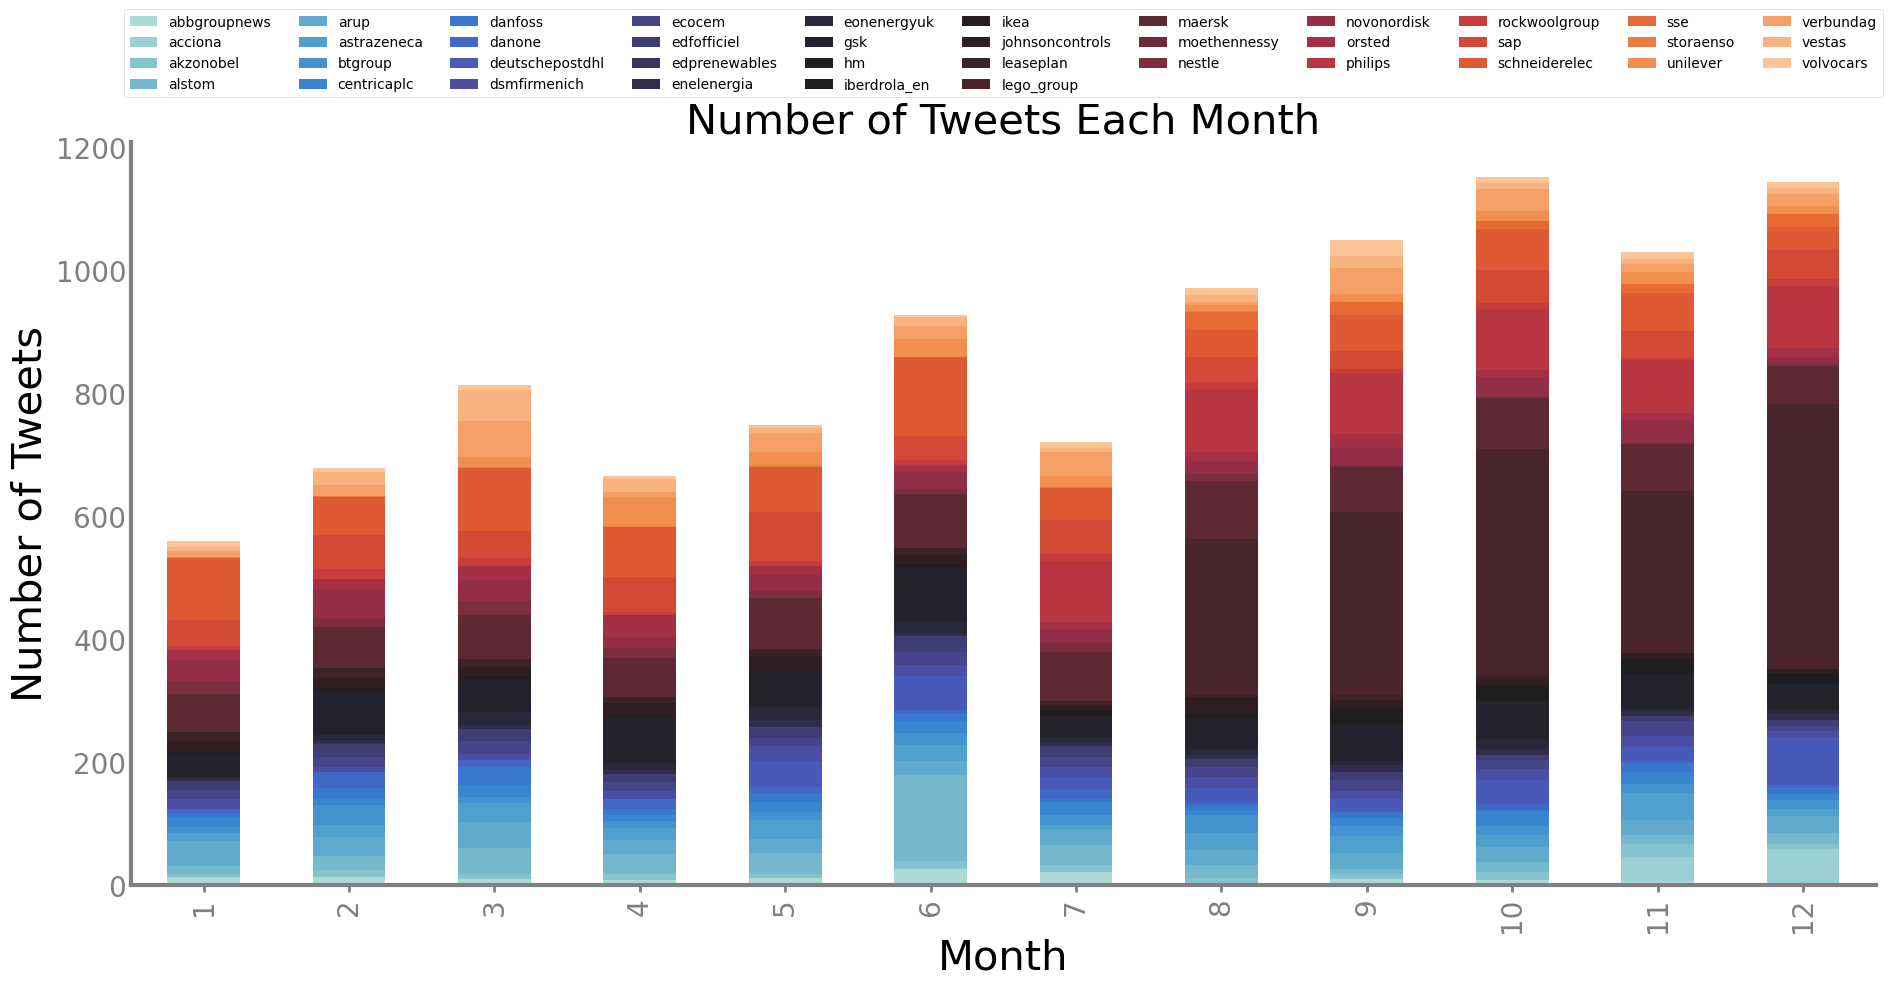

In [182]:


df_plot = df.groupby(['month', 'username']).size().reset_index().pivot(columns='username', index='month', values=0)

# Plotting
plt.figure(figsize=(15, 12))

# Plot Number of Tweets per Day
df_plot.plot(kind='bar', stacked=True)
plt.title('Number of Tweets Each Month', fontsize=30)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Number of Tweets', fontsize=30)
# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Set x-axis label and its font size
plt.grid(False)
plt.legend(numpoints=1, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=11, markerscale=0.5)
plt.tight_layout()
plt.show()


In [183]:
df.lang.unique()

array(['en', 'es', 'qme', 'art', 'qam', 'fr', 'cs', 'zxx', 'in', 'da',
       'de', 'und', 'tl', 'pl', 'ca', 'it', 'tr', 'pt', 'ar', 'qht', 'fi',
       'lv', 'ht', 'nl', 'sl', 'uk', 'lt'], dtype=object)

In [200]:
tmp = df.loc[~df.lang.isin(['qme', 'art', 'qam', 'zxx', 'und', 'qht', 'ar'])]

In [203]:
len(tmp.lang.unique())

20

<Figure size 1500x1200 with 0 Axes>

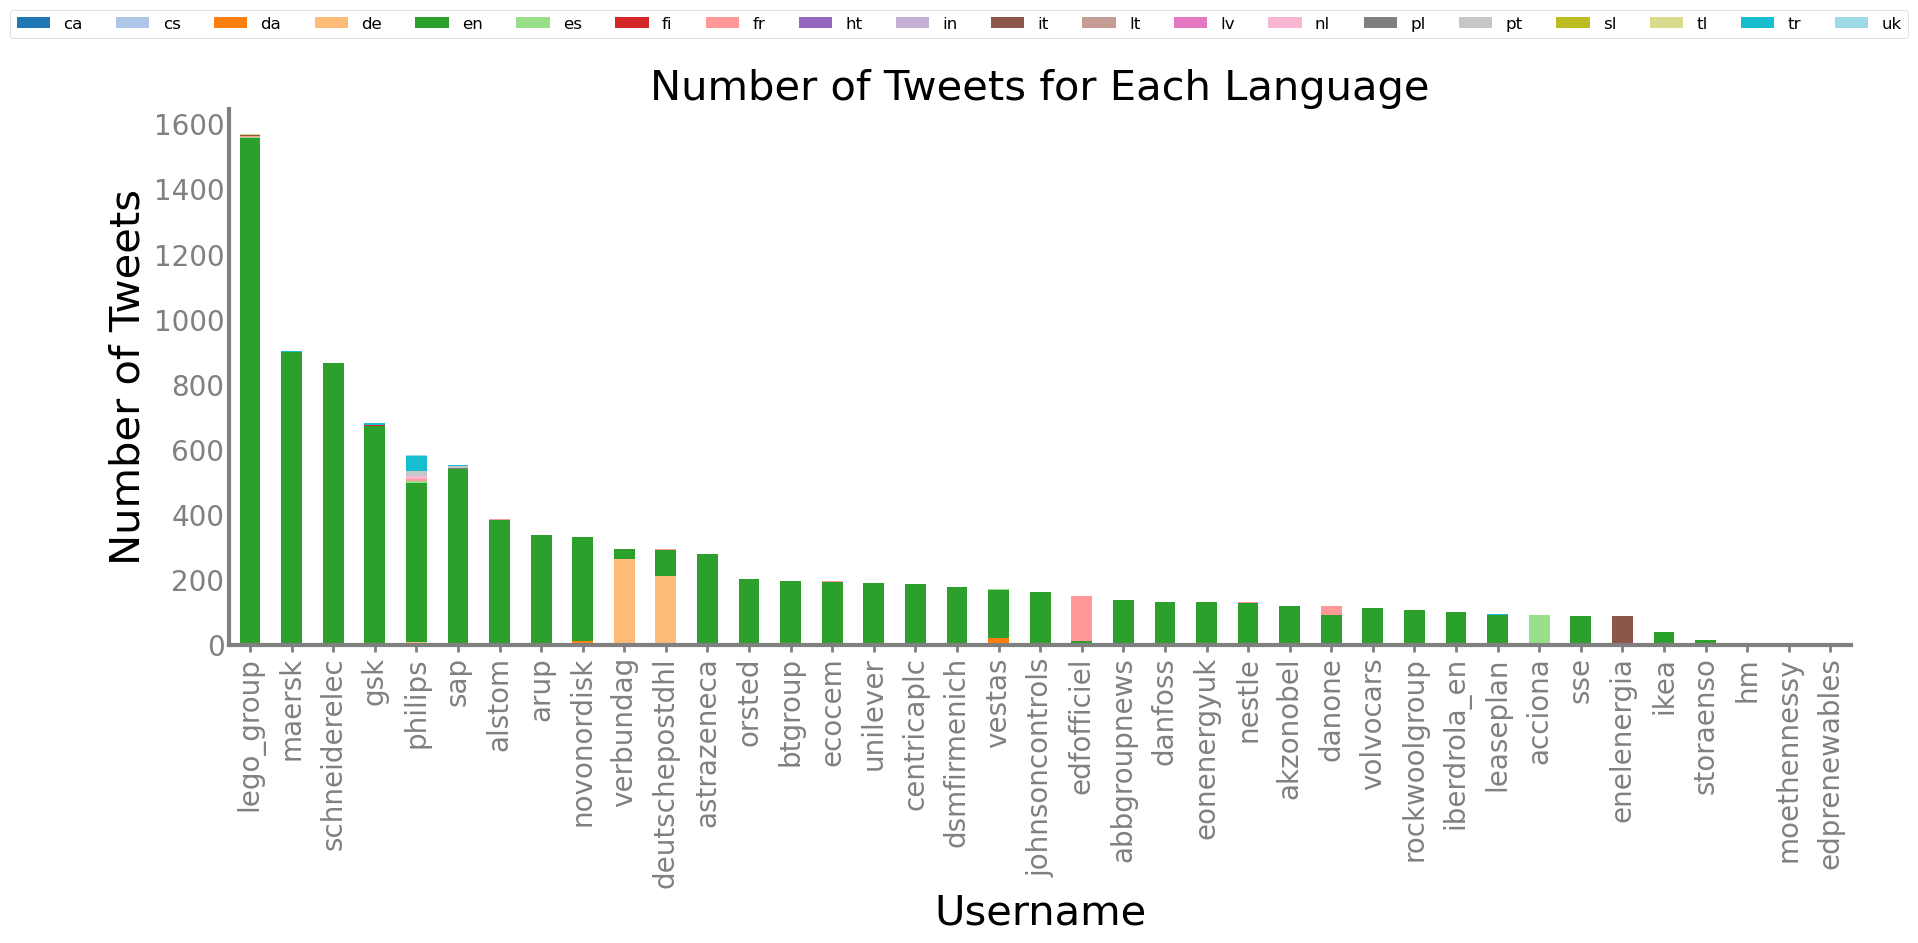

In [212]:
palette = sns.color_palette("tab20", n_colors=20)
sns.set_palette(palette)

df_plot = tmp.groupby(['lang', 'username']).size().reset_index().pivot(columns='lang', index='username', values=0)

# Summing up the values for each username
df_plot['total_tweets'] = df_plot.sum(axis=1)

# Sorting by total_tweets in descending order
df_plot = df_plot.sort_values(by='total_tweets', ascending=False)

# Plotting
plt.figure(figsize=(15, 12))

# Plot Number of Tweets per Day
df_plot.drop(columns='total_tweets').plot(kind='bar', stacked=True)
plt.title('Number of Tweets for Each Language', fontsize=30)
plt.xlabel('Username', fontsize=30)
plt.ylabel('Number of Tweets', fontsize=30)
# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Set x-axis label and its font size
plt.grid(False)
plt.legend(numpoints=1, loc="upper center", bbox_to_anchor=(0.45, 1.2), ncol=len(df_plot.index.unique()), markerscale=0.5, fontsize=12)
plt.tight_layout()
plt.show()



<Figure size 1500x1200 with 0 Axes>

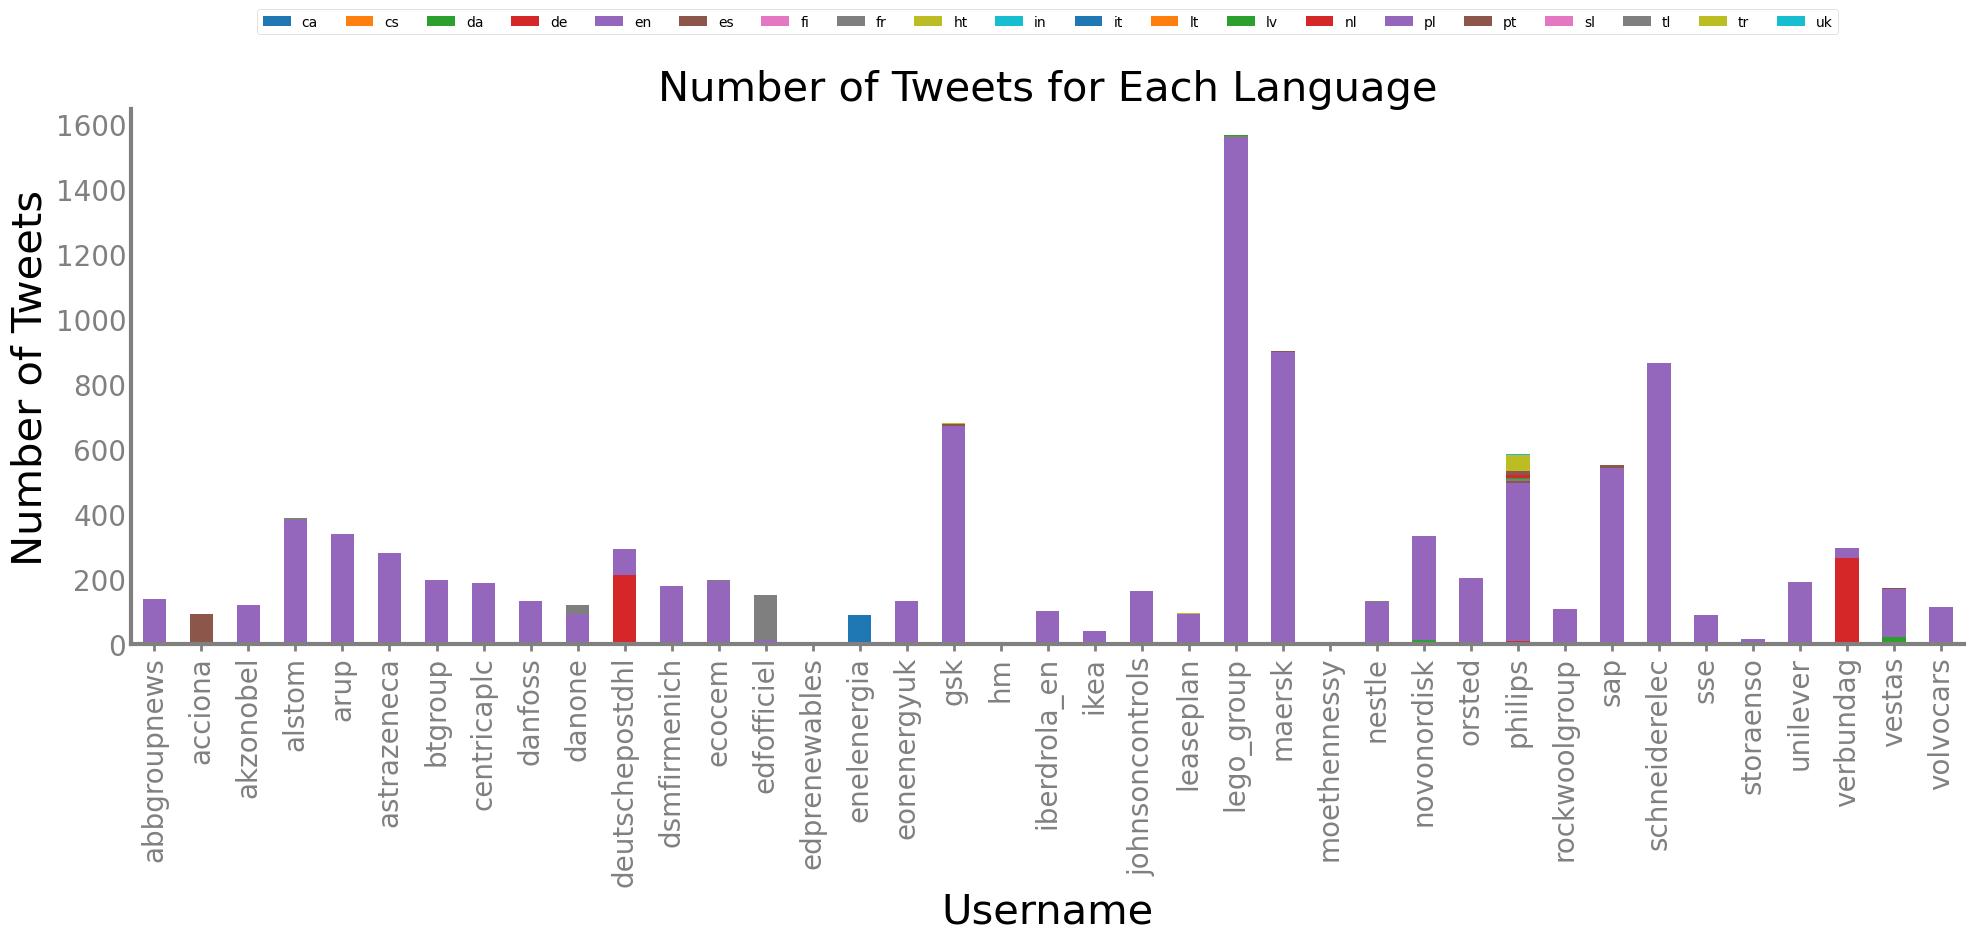

In [202]:
palette = sns.color_palette("tab10", n_colors=len(tmp.lang.unique()))
sns.set_palette(palette)

df_plot = tmp.groupby(['lang', 'username']).size().reset_index().pivot(columns='lang', index='username', values=0)

# Plotting
plt.figure(figsize=(15, 12))

# Plot Number of Tweets per Day
df_plot.plot(kind='bar', stacked=True)
plt.title('Number of Tweets for Each Language', fontsize=30)
plt.xlabel('Username', fontsize=30)
plt.ylabel('Number of Tweets', fontsize=30)
# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Set x-axis label and its font size
plt.grid(False)
plt.legend(numpoints=1, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=len(df_plot.index.unique()), markerscale=0.5)
plt.tight_layout()
plt.show()